# Kaggle Titanic
[데이터 다운로드](https://www.kaggle.com/competitions/titanic/data)


코드 부분은 지우고 결과 부분만 남겨 뒀습니다.  
남아있는 결과와 동일하게 출력될 수 있도록 코드를 작성해보세요!  

### 사용 라이브러리

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

### Data Load

In [62]:
train = pd.read_csv("data/train.csv", encoding="utf-8")
train.shape

(891, 12)

### 기본 정보

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 결측치 확인

<AxesSubplot:>

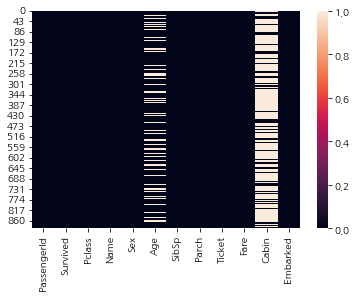

In [7]:
sns.heatmap(train.isnull())

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
train[["Age", "Cabin", "Embarked"]].isnull().mean()

Age         0.198653
Cabin       0.771044
Embarked    0.002245
dtype: float64

### 생존자

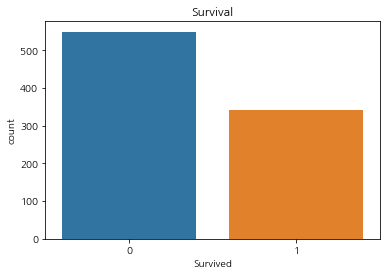

In [22]:
sns.countplot(data = train, x = "Survived")
plt.title("Survival");

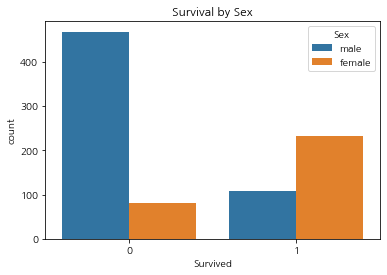

In [23]:
sns.countplot(data = train, x = "Survived", hue = "Sex")
plt.title("Survival by Sex");

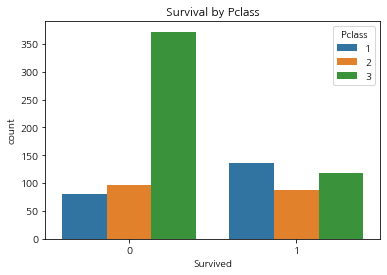

In [24]:
sns.countplot(data = train, x = "Survived", hue = "Pclass")
plt.title("Survival by Pclass");

### Data Cleaning
#### Age

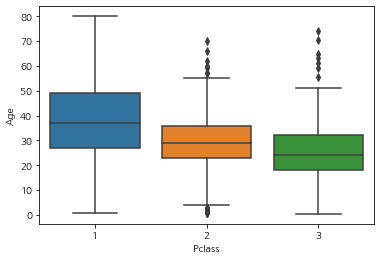

In [26]:
sns.boxplot(data = train, x = "Pclass", y = "Age");

In [63]:
train.groupby("Pclass")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


결측치가 있는 `Age`를 `Pclass`의 평균 나이값을 이용해 대채

In [64]:
def age_pclass(cols):
    # 직접 작성하시면 됩니다
    age_mean = train.groupby("Pclass")[cols].describe().mean()
    
    train.loc[(train[cols].isnull()) & (train["Pclass"] == 1), cols] = age_mean[0]
    train.loc[(train[cols].isnull()) & (train["Pclass"] == 2), cols] = age_mean[1]
    train.loc[(train[cols].isnull()) & (train["Pclass"] == 3), cols] = age_mean[2]

    return

In [65]:
# age_pclass 함수를 이용해 Age 결측치 채우기

age_pclass("Age")

In [66]:
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
224,225,1,1,"Hoyt, Mr. Frederick Maxfield",male,38.000000,1,0,19943,90.0000,C93,S
216,217,1,3,"Honkanen, Miss. Eliina",female,27.000000,0,0,STON/O2. 3101283,7.9250,NaN,S
781,782,1,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17.000000,1,0,17474,57.0000,B20,S
805,806,0,3,"Johansson, Mr. Karl Johan",male,31.000000,0,0,347063,7.7750,NaN,S
532,533,0,3,"Elias, Mr. Joseph Jr",male,17.000000,1,1,2690,7.2292,NaN,C
639,640,0,3,"Thorneycroft, Mr. Percival",male,13.766444,1,0,376564,16.1000,NaN,S
733,734,0,2,"Berriman, Mr. William John",male,23.000000,0,0,28425,13.0000,NaN,S
625,626,0,1,"Sutton, Mr. Frederick",male,61.000000,0,0,36963,32.3208,D50,S
139,140,0,1,"Giglio, Mr. Victor",male,24.000000,0,0,PC 17593,79.2000,B86,C
123,124,1,2,"Webber, Miss. Susan",female,32.500000,0,0,27267,13.0000,E101,S


#### 범주형 데이터 변환

범주형 데이터는 학습에서 바로 사용이 불가능하기 때문에 수치형으로 변환이 필요합니다.  
예를 들어, `Sex`의 경우 `Male=0`, `Female=1`과 같이 변환을 합니다.

In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


현재 범주형 데이터는, `Name, Sex, Ticket, Embarked`가 있음

#### pd.get_dummies
학습 이전에 모든 데이터를 수치로 변환해주는 전처리 작업이 필요함  
1. 수치형 데이터로 변환
2. 수치화된 데이터를 가변수화

##### Note!!! - 가변수화
수치형 데이터로만 변환하면, **서로 간의 관계성**이 생기게 되어버림
- 월, 화, 수 ... -> 1, 2, 3 ...
- 1+2=3 / 월+화=수라는 관계성이 성립해버림

`pandas`의 `get_dummies` 함수는 원핫인코딩을 이용하는 방식  
`get_dummies(data=, prefix=, prefix_sep=, dummy_na=, columns=, drop_first=, dtype=)` 형식으로 존재함
- data: one-hot encoding을 적용할 데이터
- prefix: 생성할 더미 데이터(가변수화된 데이터)의 컬럼 prefix
- prefix_sep: `default='_'`
- dummpy_na: `NaN`도 포함시킬지, `default=False`
- columns: 대상 컬럼
- drop_first: k개의 범주를 k-1개로 가변수화할 경우 사용
- dtype: 새로운 columns의 데이터 타입

In [70]:
train["male"] = train["Sex"]

train.loc[(train["Sex"] == "male"), "male"] = 0
train.loc[(train["Sex"] == "female"), "male"] = 1

# train = train["male"].astype(int)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,13.766444,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,0


In [160]:
train = train.drop(columns = "Sex")

In [127]:
train["Embarked"] = train["Embarked"].astype(str)

In [162]:
EM_C = train[train["Embarked"].str.contains("C")].index
train.drop(EM_C, inplace = True)

In [166]:
train = train.dropna()
train.sample(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,male
751,752,1,3,6.0,0,1,12.4750,E121,S,0
88,89,1,1,23.0,3,2,263.0000,C23 C25 C27,S,1
745,746,0,1,70.0,1,1,71.0000,B22,S,0
3,4,1,1,35.0,1,0,53.1000,C123,S,1
332,333,0,1,38.0,0,1,153.4625,C91,S,0
336,337,0,1,29.0,1,0,66.6000,C2,S,0
701,702,1,1,35.0,0,0,26.2875,E24,S,0
492,493,0,1,55.0,0,0,30.5000,C30,S,0
66,67,1,2,29.0,0,0,10.5000,F33,S,1
55,56,1,1,238.0,0,0,35.5000,C52,S,0


In [173]:
train2 = pd.get_dummies(data = train, columns = ["Embarked"], prefix = "", prefix_sep = "")

In [175]:
train2 = train2.drop(columns = "nan")

In [176]:
train2

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
3,4,1,1,35.0,1,0,53.1000,C123,1,0,1
6,7,0,1,54.0,0,0,51.8625,E46,0,0,1
10,11,1,3,4.0,1,1,16.7000,G6,1,0,1
11,12,1,1,58.0,0,0,26.5500,C103,1,0,1
21,22,1,2,34.0,0,0,13.0000,D56,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
862,863,1,1,48.0,0,0,25.9292,D17,1,0,1
867,868,0,1,31.0,0,0,50.4958,A24,0,0,1
871,872,1,1,47.0,1,1,52.5542,D35,1,0,1
872,873,0,1,33.0,0,0,5.0000,B51 B53 B55,0,0,1
